In [57]:
#import libraries
#from urllib.request import urlretrieve
import pandas as pd 
import numpy as np

In [58]:
#making dataframe
#url='https://nihcc.app.box.com/v/ChestXray-NIHCC/file/219760887468'# need to be in local
#df=pd.read_csv(url)
df=pd.read_csv("/Users/neeharika/Documents/datascience-course/Data-Analysis/Data_Entry_2017.csv") 
print(df.head(3))



        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                        0.143  0.143  
2                        0.168  0.168  


In [59]:
#analyse the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
Image Index                    112120 non-null object
Finding Labels                 112120 non-null object
Follow-up #                    112120 non-null int64
Patient ID                     112120 non-null int64
Patient Age                    112120 non-null int64
Patient Gender                 112120 non-null object
View Position                  112120 non-null object
OriginalImage[Width            112120 non-null int64
Height]                        112120 non-null int64
OriginalImagePixelSpacing[x    112120 non-null float64
y]                             112120 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB


In [60]:
df.groupby('Patient Gender').size()

Patient Gender
F    48780
M    63340
dtype: int64

In [61]:
print (df['Patient Age'])

0         58
1         58
2         58
3         81
4         81
          ..
112115    39
112116    29
112117    42
112118    30
112119    27
Name: Patient Age, Length: 112120, dtype: int64


In [62]:
df.groupby('Patient Age').size()# This is not grouping by age
#type(df) #not giving the maximum value ??
#df.iloc[9,4]

Patient Age
1       16
2       83
3       84
4      105
5      137
      ... 
155      2
411      1
412      3
413      1
414      1
Length: 107, dtype: int64

In [63]:
df['Patient Age'].describe() #not giving the minimum value ??

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64

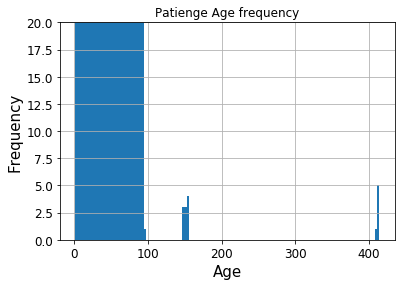

In [64]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/Users/neeharika/Documents/datascience-course/Data-Analysis/Data_Entry_2017.csv")
df['Patient Age'].hist(bins=150, grid=True, xlabelsize=12, ylabelsize=12)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.ylim(0,20)
plt.title('Patienge Age frequency')
plt.show()

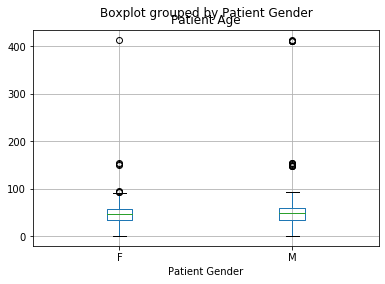

In [65]:
df.boxplot(column='Patient Age',by='Patient Gender')
plt.show()

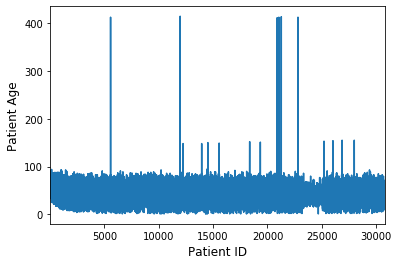

In [66]:
#plot patient age and patient id to show that some date points have noted the age not reasonalble
df.plot(x='Patient ID',y='Patient Age',legend=None)
plt.xlabel('Patient ID',fontsize=12)
plt.ylabel('Patient Age',fontsize=12)
plt.show()



In [67]:
#Filtering the "Age" data
#print(list(df.columns.values))
df.rename(columns={'Image Index':'img_index','Finding Labels':'labels','Follow-up #':'follow_up','Patient ID':'pa_id',
                   'Patient Age':'pa_age','Patient Gender':'pa_gender','View Position':'view_position'}, inplace=True)
#print(df.head())
Age_below_117 = df['pa_age'] < 117 
df[Age_below_117]
tidy_df=df[Age_below_117]
tidy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112104 entries, 0 to 112119
Data columns (total 11 columns):
img_index                      112104 non-null object
labels                         112104 non-null object
follow_up                      112104 non-null int64
pa_id                          112104 non-null int64
pa_age                         112104 non-null int64
pa_gender                      112104 non-null object
view_position                  112104 non-null object
OriginalImage[Width            112104 non-null int64
Height]                        112104 non-null int64
OriginalImagePixelSpacing[x    112104 non-null float64
y]                             112104 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 10.3+ MB


In [68]:
#number of data points to be disqualified
disqualifiedpoints = 112120-112104
print(disqualifiedpoints)

16


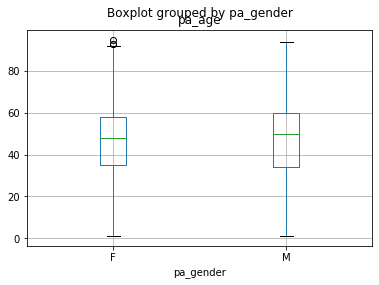

In [69]:
tidy_df.boxplot(column='pa_age',by='pa_gender')
plt.show()


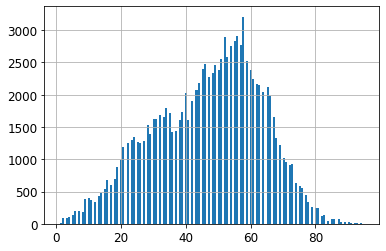

In [70]:
tidy_df['pa_age'].hist(bins=150, grid=True, xlabelsize=12, ylabelsize=12)
plt.show()

In [71]:
# adding columns for the 14 Diseases (Atelectasis, Consolidation, Infiltration, Pneumothorax, Edema, Emphysema, 
#Fibrosis, Effusion, Pneumonia,Pleural thickening, Cardiomegaly, Nodule, Mass and Hernia)
#tidy_df["Atelectasis"]=""
#tidy_df


In [72]:
#import glob
images = tidy_df['img_index']
#print(images.head())
#for img in images
#pattern='*.png'
#image_files=glob.glob(pattern)
#print(image_files[0])
#tidy_data['img_index']
img = plt.imread(images[0])
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '00000001_000.png'